In [1]:
import torch
from data import Data
from train import train
from model import RNN
import matplotlib.pyplot as plt



In [2]:

data = Data()
model = RNN(len(data.vocab), 256, len(data.categories))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
losses = []



Arabic
Chinese
Czech
Dutch
English
French
German
Greek
Irish
Italian
Japanese
Korean
Polish
Portuguese
Russian
Scottish
Spanish
Vietnamese


In [3]:
train(
    model,
    criterion,
    optimizer,
    epochs=100000,
    data=data,
    losses=losses
)

Iterations: 1000 | loss: 2.865451549053192
Iterations: 2000 | loss: 2.8095970203876495
Iterations: 3000 | loss: 2.7057888602614404
Iterations: 4000 | loss: 2.4050828749388455
Iterations: 5000 | loss: 2.2342852455824613
Iterations: 6000 | loss: 2.0316530069932344
Iterations: 7000 | loss: 2.045303371094167
Iterations: 8000 | loss: 1.983481831666082
Iterations: 9000 | loss: 1.8534821699671447
Iterations: 10000 | loss: 1.9124604096785187
Iterations: 11000 | loss: 1.8415839486308396
Iterations: 12000 | loss: 1.7913818822726608
Iterations: 13000 | loss: 1.8497780509591102
Iterations: 14000 | loss: 1.7315141803929581
Iterations: 15000 | loss: 1.720058274719864
Iterations: 16000 | loss: 1.727610463924706
Iterations: 17000 | loss: 1.6934851997625082
Iterations: 18000 | loss: 1.6160698451874778
Iterations: 19000 | loss: 1.6532458134307526
Iterations: 20000 | loss: 1.6090708575434982
Iterations: 21000 | loss: 1.5550458712652326
Iterations: 22000 | loss: 1.569086622659117
Iterations: 23000 | loss:

KeyboardInterrupt: 

In [7]:
w, c = data.random_sample()

c

tensor([10])

In [40]:
def predict(model, input, data):
    tensor = data.word2tensor(input)
    hidden_state = model.init_hidden()

    for ch in range(tensor.shape[0]):
        output, hidden_state = model(tensor[ch], hidden_state)

    category = data.tensor2category(torch.tensor([torch.argmax(output)], dtype=torch.long))
    return category

# predict(model, "Luka Modric\n", data)


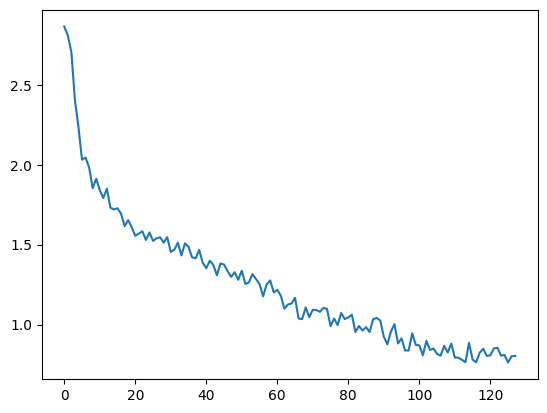

In [4]:
plt.plot(range(len(losses)), losses)

In [ ]:
while True:
    inp = input("> ")
    if inp.lower() == "quit":
        break

    category = predict(model, f"{inp}\n", data)
    print(category)

Arabic
